# Parte 2: Yelp API

**Objetivo**  
- Extraer información sobre las cualidades de los restaurantes en una ciudad de Estados Unidos.  
- Transformar los datos.  
- Analizar la información obtenida.   

## 1. Extracción de información  
En esta sección se realizará la conexión con la API de Yelp y la obtención de los datos.

### 1.1 Requerimientos previos  
En esta sección se instalan y cargan las librerías necesarias.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import os
import requests
import pandas as pd

# Cargar variables de entorno
from dotenv import load_dotenv

### 1.2 Conexión a la API de Yelp  
Aquí se establece la conexión con la API de Yelp utilizando la clave de acceso (API Key).

In [2]:

# ==========================================
# Extracción de datos de Yelp API - Restaurantes
# ==========================================
# Este script se conecta a la API de Yelp para obtener información
# sobre restaurantes en una ciudad específica (San Diego en este caso).
# Se realizan múltiples solicitudes para recolectar hasta 200 resultados.
# ==========================================

from dotenv import load_dotenv
import os
import requests

# Cargar variables de entorno (API_KEY debe estar en el archivo .env)
load_dotenv()

# Configuración de la API de Yelp
url = "https://api.yelp.com/v3/businesses/search"  # Endpoint de búsqueda
api_key = os.getenv("API_KEY")                     # Clave de la API desde .env
headers = {'Authorization': f'Bearer {api_key}'}   # Autenticación requerida

# Parámetros de búsqueda
ciudad = 'San Diego'       # Ciudad donde se consultarán los restaurantes
term = 'restaurant'        # Tipo de negocio a buscar
limit = 50                 # Número máximo de resultados por solicitud (máximo permitido: 50)
total_results = []         # Lista para almacenar todos los resultados

# Hacer solicitudes en bloques para obtener hasta 200 resultados
for offset in range(0, 200, limit):
    params = {
        'term': term,         # Tipo de negocio
        'location': ciudad,   # Ciudad
        'limit': limit,       # Resultados por solicitud
        'offset': offset      # Paginación (empieza en 0, 50, 100, 150)
    }
    try:
        # Solicitud a la API
        response = requests.get(url=url, params=params, headers=headers, timeout=10)

        # Si la solicitud es exitosa
        if response.status_code == 200:
            data = response.json()
            # Guardar los negocios encontrados en la lista total
            total_results.extend(data.get('businesses', []))
        else:
            # Mostrar error en caso de que el código de respuesta no sea 200
            print(f"Error en la solicitud con offset {offset}: {response.status_code}")
            break
    except requests.exceptions.RequestException as e:
        # Manejo de errores de conexión (ejemplo: tiempo de espera agotado)
        print(f"Error de conexión en la solicitud con offset {offset}: {e}")
        break




## 2. Transformación de datos  


### 2.1 Dataset consultado

In [3]:
# Convertir a DataFrame
df_yelp_rest_consult = pd.json_normalize(total_results)
print(f"Total de registros obtenidos: {len(df_yelp_rest_consult)}")

Total de registros obtenidos: 200


In [4]:
df_yelp_rest_consult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        200 non-null    object 
 1   alias                     200 non-null    object 
 2   name                      200 non-null    object 
 3   image_url                 200 non-null    object 
 4   is_closed                 200 non-null    bool   
 5   url                       200 non-null    object 
 6   review_count              200 non-null    int64  
 7   categories                200 non-null    object 
 8   rating                    200 non-null    float64
 9   transactions              200 non-null    object 
 10  price                     164 non-null    object 
 11  phone                     200 non-null    object 
 12  display_phone             200 non-null    object 
 13  distance                  200 non-null    float64
 14  coordinate

In [5]:
df_yelp_rest_consult.sample(5)

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,transactions,...,coordinates.latitude,coordinates.longitude,location.address1,location.address2,location.address3,location.city,location.zip_code,location.country,location.state,location.display_address
190,7CjC7lj7bXvjPPRb_HqM3g,ee-nami-tonkatsu-izakaya-san-diego,EE NAMI Tonkatsu Izakaya,https://s3-media0.fl.yelpcdn.com/bphoto/cFquyZ...,False,https://www.yelp.com/biz/ee-nami-tonkatsu-izak...,638,"[{'alias': 'izakaya', 'title': 'Izakaya'}, {'a...",4.5,"[pickup, delivery]",...,32.835515,-117.189242,4706 Clairemont Mesa Blvd,None,,San Diego,92117,US,CA,"[4706 Clairemont Mesa Blvd, San Diego, CA 92117]"
176,PLEh6w_76YwLx6ozXthRmQ,shorebird-san-diego-2,Shorebird,https://s3-media0.fl.yelpcdn.com/bphoto/FX7wjD...,False,https://www.yelp.com/biz/shorebird-san-diego-2...,43,"[{'alias': 'newamerican', 'title': 'New Americ...",4.3,[restaurant_reservation],...,32.709042,-117.171998,885 W Harbor Dr,None,None,San Diego,92101,US,CA,"[885 W Harbor Dr, San Diego, CA 92101]"
150,kVSK4GWJXJZekprqdX4bIQ,dalbam-moon-night-san-diego-2,Dalbam Moon Night,https://s3-media0.fl.yelpcdn.com/bphoto/B6yFLJ...,False,https://www.yelp.com/biz/dalbam-moon-night-san...,111,"[{'alias': 'korean', 'title': 'Korean'}, {'ali...",4.6,[],...,32.820552,-117.154583,4425 Convoy St,None,,San Diego,92111,US,CA,"[4425 Convoy St, San Diego, CA 92111]"
180,lqTbsbZTD0HrlMe-PvxdJA,tahona-bar-san-diego,Tahona Bar,https://s3-media0.fl.yelpcdn.com/bphoto/XZHxeV...,False,https://www.yelp.com/biz/tahona-bar-san-diego?...,616,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.1,[delivery],...,32.751760,-117.193350,2414 San Diego Ave,None,,San Diego,92110,US,CA,"[2414 San Diego Ave, San Diego, CA 92110]"
88,i8pk_jUS5jV1kMnQEdAVbg,siamo-napoli-san-diego-2,Siamo Napoli,https://s3-media0.fl.yelpcdn.com/bphoto/yHUmMX...,False,https://www.yelp.com/biz/siamo-napoli-san-dieg...,1951,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.7,[delivery],...,32.749678,-117.129817,3959 30th St,None,,San Diego,92104,US,CA,"[3959 30th St, San Diego, CA 92104]"


Antes trabajar con el dataset, indentificamos si eisten valores duplicados en el conjunto de las tres columnas 

In [6]:
df_yelp_rest_consult.duplicated(subset=['id', 'alias', 'name']).sum()

np.int64(0)

Revisamos los valores unicos de las siguientes columnas 

In [7]:
print(df_yelp_rest_consult['location.country'].unique())
print(df_yelp_rest_consult['location.state'].unique())
print(df_yelp_rest_consult['location.city'].unique())

['US']
['CA']
['San Diego']


Se elimina las siguiente columnas:

* `id`, `alias`, `name`, `url`, `image_url`, `phone`, `display_phone`: útiles para identificación, visualización o contacto, pero no para segmentación directa.

* `coordinates.latitude`, `coordinates.longitude` : pueden usarse para análisis geoespacial avanzado o visualización en mapas.

* `location.address1`, `address2`, `address3`, `location.display_address`, `location.zip_code`: detalles de dirección para geolocalización o contacto.

Se eliminaron las siguientes columnas del DataFrame porque todas sus filas contenían **el mismo valor** (sin aportar variabilidad a los datos):

- `location.country`
- `location.state`
- `location.city`

In [8]:
#eliminacion de columnas 
df_yelp_rest_consult = df_yelp_rest_consult.drop(columns=['id', 'alias', 'url', 'image_url', 'phone', 'display_phone','coordinates.latitude', 'coordinates.longitude', 'location.address1', 'location.address2', 'location.address3', 'location.display_address','location.country', 'location.state', 'location.city', 'location.zip_code'])

### 2.2 Dataset filtrado

Ahora visualizamos el dataset con el que vamos a trabajar

In [9]:
df_yelp_rest_consult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          200 non-null    object 
 1   is_closed     200 non-null    bool   
 2   review_count  200 non-null    int64  
 3   categories    200 non-null    object 
 4   rating        200 non-null    float64
 5   transactions  200 non-null    object 
 6   price         164 non-null    object 
 7   distance      200 non-null    float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 11.3+ KB


Descripcion del dataset:

* `name`: Nombre completo del restaurante.

* `is_closed`: Booleano que indica si el restaurante está cerrado (True) o abierto (False).

* `review_count`: Número total de reseñas que tiene el restaurante en Yelp. Indica popularidad y actividad.

* `categories`: Lista de categorías o tipos de comida que ofrece el restaurante (por ejemplo, italiana, mexicana, bar de vinos). Es un campo complejo con alias y títulos.

* `rating`: Calificación promedio del restaurante en Yelp, en una escala de 1 a 5.

* `transactions`: Tipos de transacciones que el restaurante soporta, como "pickup" (para recoger), "delivery" (entrega), o "restaurant_reservation" (reservas).

* `price`: Indicador del rango de precios del restaurante, generalmente con símbolos como $, $$, $$$, etc., donde más símbolos indican precios más altos.


* `distance`: Distancia en metros desde el punto de búsqueda (en este caso, la ciudad o ubicación que definiste en la API).




identificamos valores nulos 

In [10]:
porcentaje_nulos = df_yelp_rest_consult.isna().mean()*100
print(porcentaje_nulos)

name             0.0
is_closed        0.0
review_count     0.0
categories       0.0
rating           0.0
transactions     0.0
price           18.0
distance         0.0
dtype: float64


### Columna `price`

imputamos los valores nulos con la moda 

In [11]:
# Calcular la moda de la columna 'price'
moda_price = df_yelp_rest_consult['price'].mode()[0]

# Imputar los valores nulos con la moda
df_yelp_rest_consult['price'] = df_yelp_rest_consult['price'].fillna(moda_price)

### Columna `transactions`

esta columna tiene lista con los difrentes tipos de transaciiones, primero describimos cuantos elementos tiene las listas

In [12]:
# Contar cuántos elementos tiene cada lista en la columna 'transactions'
df_yelp_rest_consult['num_transactions'] = df_yelp_rest_consult['transactions'].apply(len)

# Ver los primeros resultados
print(df_yelp_rest_consult[['transactions', 'num_transactions']].head())


                                 transactions  num_transactions
0                                          []                 0
1  [delivery, pickup, restaurant_reservation]                 3
2                          [pickup, delivery]                 2
3                                  [delivery]                 1
4                                          []                 0


Desglosar la lista en varias filas

In [13]:
df_yelp_rest_consult.head()

,name,is_closed,review_count,categories,rating,transactions,price,distance,num_transactions
0,C Level,False,5279,"[{'alias': 'newamerican', 'title': 'New Americ...",4.3,[],$$,8072.435852,0
1,Ristorante Illando,False,3291,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"[delivery, pickup, restaurant_reservation]",$$,7523.727796,3
2,Flama Llama,False,3648,"[{'alias': 'latin', 'title': 'Latin American'}...",4.7,"[pickup, delivery]",$$,3385.778806,2
3,Cesarina,False,3249,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.7,[delivery],$$$,9190.980627,1
4,The Remy,False,485,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",4.4,[],$$,4548.904998,0


In [14]:
# Obtener todos los elementos únicos de las listas
all_elements = set()
df_yelp_rest_consult['transactions'].apply(lambda x: all_elements.update(x))

# Crear nuevas columnas para cada elemento único
for element in all_elements:
    df_yelp_rest_consult[element] = df_yelp_rest_consult['transactions'].apply(lambda x: 'Offered' if element in x else 'Not Offered')


# Guardar el resultado en un nuevo archivo CSV
# df.to_csv('resultado.csv', index=False)

In [15]:
df_yelp_rest_consult.head()

,name,is_closed,review_count,categories,rating,transactions,price,distance,num_transactions,pickup,delivery,restaurant_reservation
0,C Level,False,5279,"[{'alias': 'newamerican', 'title': 'New Americ...",4.3,[],$$,8072.435852,0,Not Offered,Not Offered,Not Offered
1,Ristorante Illando,False,3291,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,"[delivery, pickup, restaurant_reservation]",$$,7523.727796,3,Offered,Offered,Offered
2,Flama Llama,False,3648,"[{'alias': 'latin', 'title': 'Latin American'}...",4.7,"[pickup, delivery]",$$,3385.778806,2,Offered,Offered,Not Offered
3,Cesarina,False,3249,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.7,[delivery],$$$,9190.980627,1,Not Offered,Offered,Not Offered
4,The Remy,False,485,"[{'alias': 'steak', 'title': 'Steakhouses'}, {...",4.4,[],$$,4548.904998,0,Not Offered,Not Offered,Not Offered


In [16]:
df_yelp_rest_consult = df_yelp_rest_consult.explode('transactions')


In [17]:
df_yelp_rest_consult.head(5)

,name,is_closed,review_count,categories,rating,transactions,price,distance,num_transactions,pickup,delivery,restaurant_reservation
0,C Level,False,5279,"[{'alias': 'newamerican', 'title': 'New Americ...",4.3,NaN,$$,8072.435852,0,Not Offered,Not Offered,Not Offered
1,Ristorante Illando,False,3291,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,delivery,$$,7523.727796,3,Offered,Offered,Offered
1,Ristorante Illando,False,3291,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,pickup,$$,7523.727796,3,Offered,Offered,Offered
1,Ristorante Illando,False,3291,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,restaurant_reservation,$$,7523.727796,3,Offered,Offered,Offered
2,Flama Llama,False,3648,"[{'alias': 'latin', 'title': 'Latin American'}...",4.7,pickup,$$,3385.778806,2,Offered,Offered,Not Offered


### Columna `price`

In [18]:
#valore unicos en la columna price
df_yelp_rest_consult['price'].unique()

array(['$$', '$$$', '$$$$', '$'], dtype=object)

In [19]:
# Diccionario de mapeo de precios a etiquetas
price_mapping = {
    '$': 'Low Price',
    '$$': 'Medium Price',
    '$$$': 'High Price',
    '$$$$': 'Very High Price'
}

# Reemplazar los valores en la columna 'price'
df_yelp_rest_consult['price'] = df_yelp_rest_consult['price'].replace(price_mapping)

# Ver los nuevos valores únicos
print(df_yelp_rest_consult['price'].unique())

['Medium Price' 'High Price' 'Very High Price' 'Low Price']


In [20]:
df_yelp_rest_consult.head(4)

,name,is_closed,review_count,categories,rating,transactions,price,distance,num_transactions,pickup,delivery,restaurant_reservation
0,C Level,False,5279,"[{'alias': 'newamerican', 'title': 'New Americ...",4.3,NaN,Medium Price,8072.435852,0,Not Offered,Not Offered,Not Offered
1,Ristorante Illando,False,3291,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,delivery,Medium Price,7523.727796,3,Offered,Offered,Offered
1,Ristorante Illando,False,3291,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,pickup,Medium Price,7523.727796,3,Offered,Offered,Offered
1,Ristorante Illando,False,3291,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,restaurant_reservation,Medium Price,7523.727796,3,Offered,Offered,Offered


### Columna `category`

In [21]:
# Extraer la lista de títulos de cada registro
df_yelp_rest_consult['category_titles'] = df_yelp_rest_consult['categories'].apply(lambda x: [d['title'] for d in x])

# Explode para que cada título quede en una fila separada
df_yelp_rest_consult = df_yelp_rest_consult.explode('category_titles')

# Opcional: renombrar la columna para claridad
df_yelp_rest_consult = df_yelp_rest_consult.rename(columns={'category_titles': 'category_title'})

# Ahora cada restaurante tendrá una fila por cada categoría (title)
df_yelp_rest_consult[['name', 'category_title']]

,name,category_title
0,C Level,New American
0,C Level,Seafood
0,C Level,Steakhouses
1,Ristorante Illando,Italian
1,Ristorante Illando,Italian
...,...,...
198,El Agave Restaurant & Tequileria,Mexican
198,El Agave Restaurant & Tequileria,Bars
198,El Agave Restaurant & Tequileria,Mexican
198,El Agave Restaurant & Tequileria,Bars


In [22]:
df_yelp_rest_consult.head()

,name,is_closed,review_count,categories,rating,transactions,price,distance,num_transactions,pickup,delivery,restaurant_reservation,category_title
0,C Level,False,5279,"[{'alias': 'newamerican', 'title': 'New Americ...",4.3,NaN,Medium Price,8072.435852,0,Not Offered,Not Offered,Not Offered,New American
0,C Level,False,5279,"[{'alias': 'newamerican', 'title': 'New Americ...",4.3,NaN,Medium Price,8072.435852,0,Not Offered,Not Offered,Not Offered,Seafood
0,C Level,False,5279,"[{'alias': 'newamerican', 'title': 'New Americ...",4.3,NaN,Medium Price,8072.435852,0,Not Offered,Not Offered,Not Offered,Steakhouses
1,Ristorante Illando,False,3291,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,delivery,Medium Price,7523.727796,3,Offered,Offered,Offered,Italian
1,Ristorante Illando,False,3291,"[{'alias': 'italian', 'title': 'Italian'}]",4.4,pickup,Medium Price,7523.727796,3,Offered,Offered,Offered,Italian


In [23]:
df_yelp_rest_consult.sample(3)

,name,is_closed,review_count,categories,rating,transactions,price,distance,num_transactions,pickup,delivery,restaurant_reservation,category_title
101,Communion,False,181,"[{'alias': 'desserts', 'title': 'Desserts'}, {...",4.0,NaN,Medium Price,4843.520677,0,Not Offered,Not Offered,Not Offered,Cocktail Bars
37,Del's Hideout,False,1168,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.3,delivery,Medium Price,6672.458230,2,Offered,Offered,Not Offered,Salad
59,Cocina De Barrio,False,213,"[{'alias': 'breakfast_brunch', 'title': 'Break...",4.8,NaN,Medium Price,5090.260652,0,Not Offered,Not Offered,Not Offered,Cocktail Bars


In [24]:
df_yelp_rest_consult = df_yelp_rest_consult.drop(columns=["categories"])

In [25]:
df_yelp_rest_consult.head()

,name,is_closed,review_count,rating,transactions,price,distance,num_transactions,pickup,delivery,restaurant_reservation,category_title
0,C Level,False,5279,4.3,NaN,Medium Price,8072.435852,0,Not Offered,Not Offered,Not Offered,New American
0,C Level,False,5279,4.3,NaN,Medium Price,8072.435852,0,Not Offered,Not Offered,Not Offered,Seafood
0,C Level,False,5279,4.3,NaN,Medium Price,8072.435852,0,Not Offered,Not Offered,Not Offered,Steakhouses
1,Ristorante Illando,False,3291,4.4,delivery,Medium Price,7523.727796,3,Offered,Offered,Offered,Italian
1,Ristorante Illando,False,3291,4.4,pickup,Medium Price,7523.727796,3,Offered,Offered,Offered,Italian


In [26]:
df_yelp_rest_consult = df_yelp_rest_consult.drop(columns=["transactions"])

In [27]:
df_yelp_rest_consult.head()


,name,is_closed,review_count,rating,price,distance,num_transactions,pickup,delivery,restaurant_reservation,category_title
0,C Level,False,5279,4.3,Medium Price,8072.435852,0,Not Offered,Not Offered,Not Offered,New American
0,C Level,False,5279,4.3,Medium Price,8072.435852,0,Not Offered,Not Offered,Not Offered,Seafood
0,C Level,False,5279,4.3,Medium Price,8072.435852,0,Not Offered,Not Offered,Not Offered,Steakhouses
1,Ristorante Illando,False,3291,4.4,Medium Price,7523.727796,3,Offered,Offered,Offered,Italian
1,Ristorante Illando,False,3291,4.4,Medium Price,7523.727796,3,Offered,Offered,Offered,Italian


In [28]:
df_yelp_rest_consult.to_csv('df_yelp_limpio.csv', index=False)

df_.to_csv('df_clientes_limpio.csv', index=False)

## **3. Analisis estadistico**

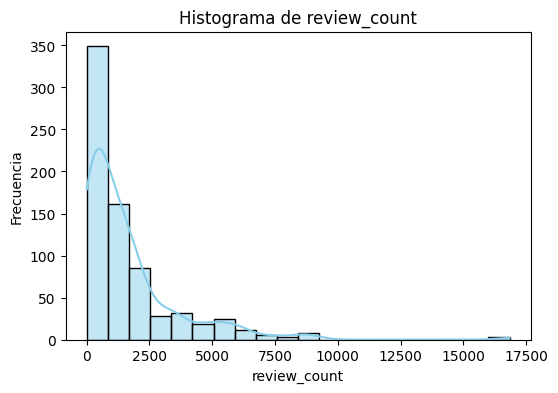

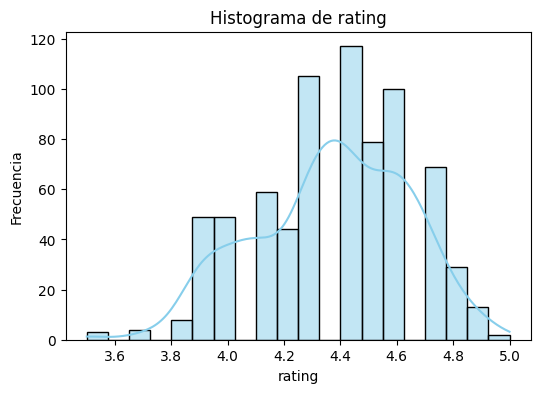

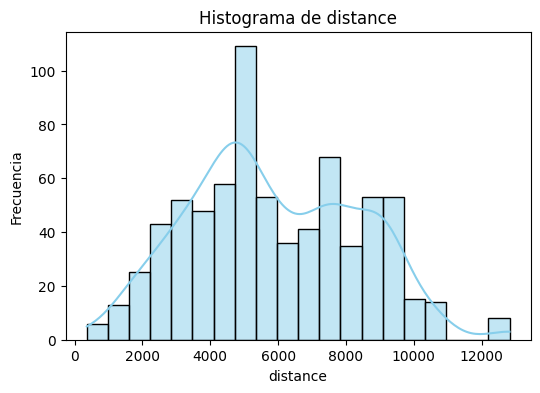

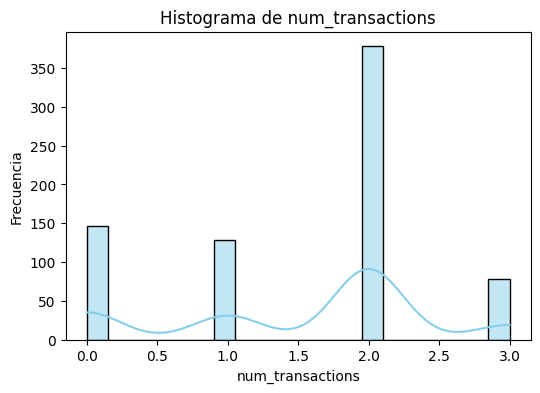

C:\Users\hola\AppData\Local\Temp\ipykernel_5588\2394192927.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


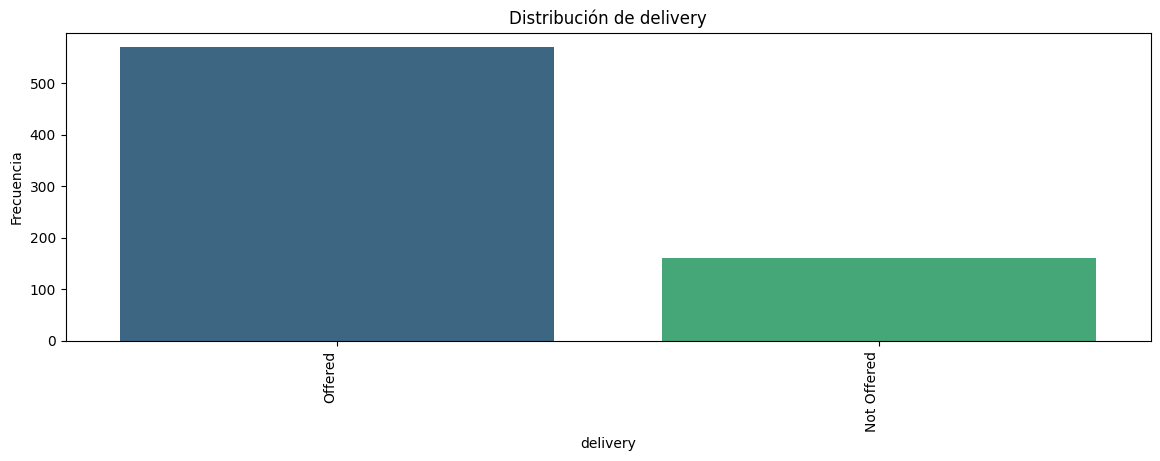

C:\Users\hola\AppData\Local\Temp\ipykernel_5588\2394192927.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


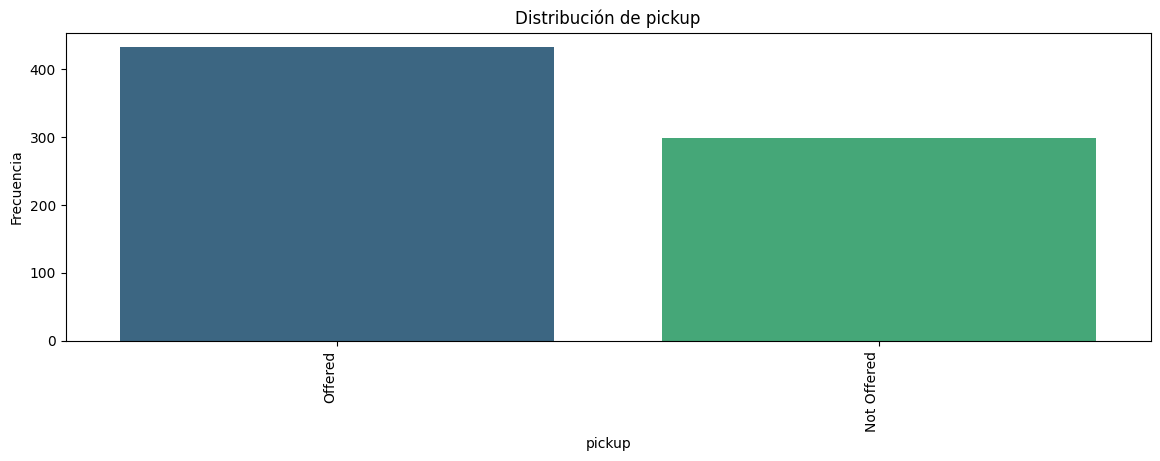

C:\Users\hola\AppData\Local\Temp\ipykernel_5588\2394192927.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


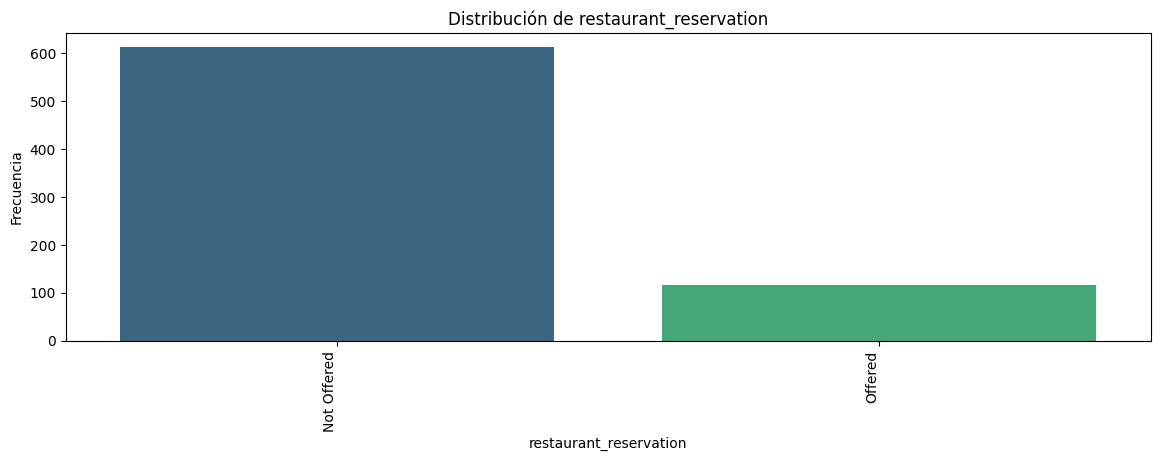

C:\Users\hola\AppData\Local\Temp\ipykernel_5588\2394192927.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


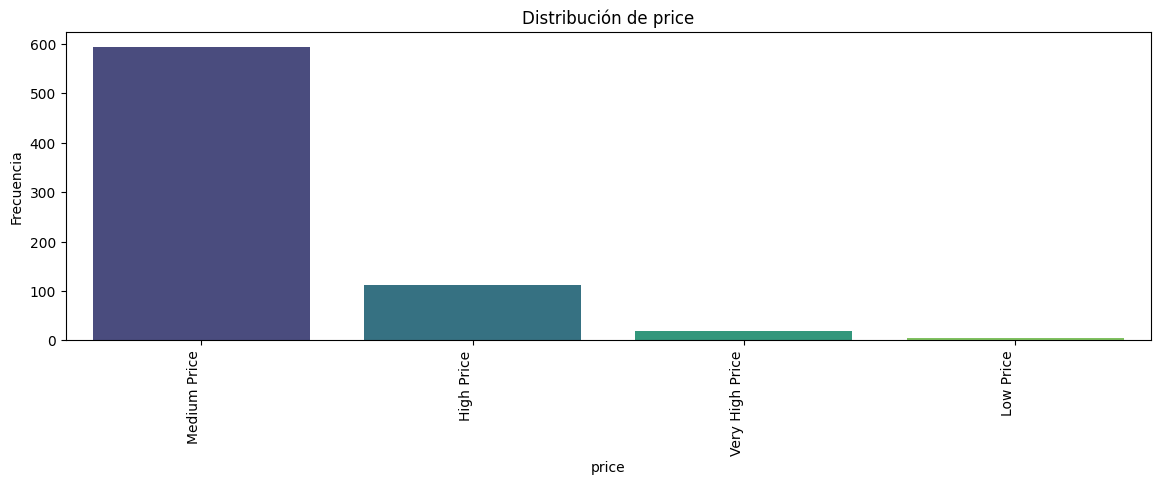

C:\Users\hola\AppData\Local\Temp\ipykernel_5588\2394192927.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)


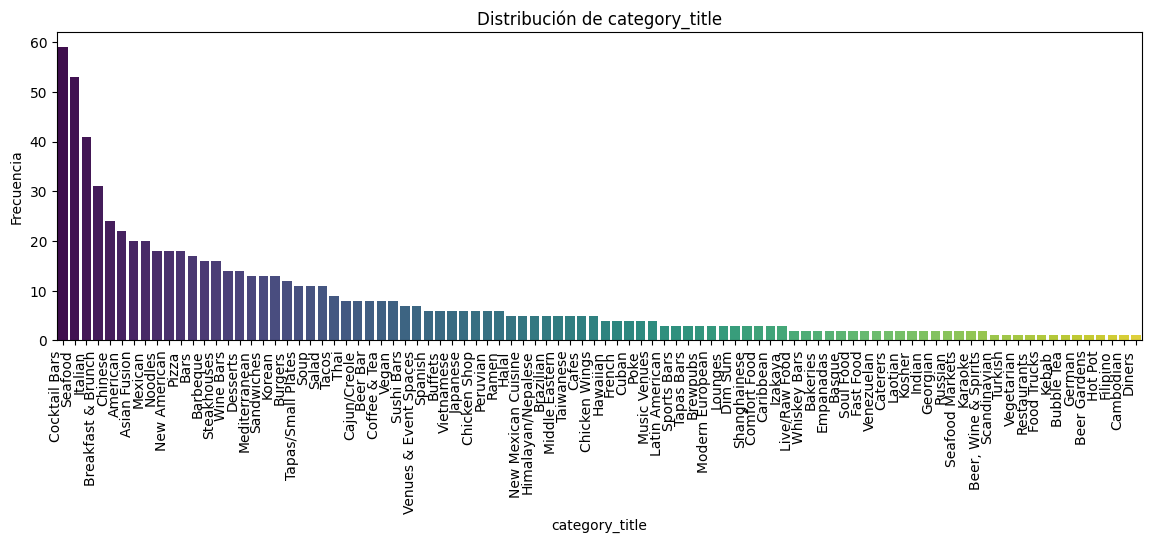

In [31]:


# Cambiar aquí por el nombre real de tu DataFrame
df = df_yelp_rest_consult  

# Seleccionar columnas numéricas
num_cols = ["review_count", "rating", "distance", "num_transactions"]

# Seleccionar columnas categóricas
cat_cols = ["delivery", "pickup", "restaurant_reservation", "price", "category_title"]

# -------------------------
# Histogramas para numéricas
# -------------------------
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df, x=col, bins=20, kde=True, color="skyblue")
    plt.title(f"Histograma de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

# -------------------------
# Gráficos de barras para categóricas
# -------------------------
for col in cat_cols:
    plt.figure(figsize=(14,4))
    sns.countplot(data=df, x=col, palette="viridis", order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=90, ha="right")
    plt.show()


In [32]:
# Estadística descriptiva para columnas categóricas
for col in cat_cols:
    print(f"📊 Análisis de la columna: {col}")
    print("-"*50)
    
    # Número de categorías únicas
    print(f"🔹 Número de categorías: {df[col].nunique()}")
    
    # Frecuencia absoluta
    print("\n🔹 Frecuencia absoluta:")
    print(df[col].value_counts())
    
    # Frecuencia relativa (porcentaje)
    print("\n🔹 Frecuencia relativa (%):")
    print(df[col].value_counts(normalize=True) * 100)
    
    # Categoría más frecuente
    print(f"\n✅ Categoría más frecuente: {df[col].mode()[0]}")
    print("="*50, "\n")


📊 Análisis de la columna: delivery
--------------------------------------------------
🔹 Número de categorías: 2

🔹 Frecuencia absoluta:
delivery
Offered        569
Not Offered    161
Name: count, dtype: int64

🔹 Frecuencia relativa (%):
delivery
Offered        77.945205
Not Offered    22.054795
Name: proportion, dtype: float64

✅ Categoría más frecuente: Offered

📊 Análisis de la columna: pickup
--------------------------------------------------
🔹 Número de categorías: 2

🔹 Frecuencia absoluta:
pickup
Offered        432
Not Offered    298
Name: count, dtype: int64

🔹 Frecuencia relativa (%):
pickup
Offered        59.178082
Not Offered    40.821918
Name: proportion, dtype: float64

✅ Categoría más frecuente: Offered

📊 Análisis de la columna: restaurant_reservation
--------------------------------------------------
🔹 Número de categorías: 2

🔹 Frecuencia absoluta:
restaurant_reservation
Not Offered    613
Offered        117
Name: count, dtype: int64

🔹 Frecuencia relativa (%):
restauran

🔹 delivery

La mayoría de los negocios ofrecen delivery (67.9%).
➡️ Esto indica que el servicio a domicilio es una práctica muy común en este conjunto de restaurantes.

🔹 pickup

El pickup no es tan popular: solo el 40.9% lo ofrece frente a un 59.1% que no.
➡️ Esto sugiere que los clientes prefieren delivery sobre recoger en el local.

🔹 restaurant_reservation

Solo el 8.9% de los restaurantes ofrecen reservas.
➡️ La gran mayoría (91.1%) funciona sin necesidad de reservar. Esto puede indicar que son restaurantes más casuales.

🔹 price

El 74.6% de los restaurantes tiene precios medios, mientras que un 20.5% son caros y apenas un 5% muy caros.
➡️ La mayoría de la oferta está enfocada a un rango de precio accesible.

🔹 category_title

Hay alta diversidad de categorías (91 tipos distintos).

Sin embargo, las más frecuentes son:

Cocktail Bars (9.7%)

Italian (7%)

Seafood (6.6%)
➡️ Esto muestra que, aunque existe mucha variedad, hay una concentración en ciertas cocinas populares.

In [33]:
# -------------------------
# Estadística descriptiva de variables categóricas
# -------------------------
for col in cat_cols:
    print("="*60)
    print(f"📊 Análisis de la columna: {col}")
    print("-"*60)
    
    # Número de categorías
    n_categorias = df[col].nunique()
    print(f"🔹 Número de categorías: {n_categorias}")
    
    # Frecuencia absoluta
    freq_abs = df[col].value_counts()
    print("\n🔹 Frecuencia absoluta:")
    print(freq_abs)
    
    # Frecuencia relativa (%)
    freq_rel = df[col].value_counts(normalize=True) * 100
    print("\n🔹 Frecuencia relativa (%):")
    print(freq_rel.round(2))
    
    # Categoría más frecuente (moda)
    moda = df[col].mode()[0]
    print(f"\n✅ Categoría más frecuente: {moda}")


📊 Análisis de la columna: delivery
------------------------------------------------------------
🔹 Número de categorías: 2

🔹 Frecuencia absoluta:
delivery
Offered        569
Not Offered    161
Name: count, dtype: int64

🔹 Frecuencia relativa (%):
delivery
Offered        77.95
Not Offered    22.05
Name: proportion, dtype: float64

✅ Categoría más frecuente: Offered
📊 Análisis de la columna: pickup
------------------------------------------------------------
🔹 Número de categorías: 2

🔹 Frecuencia absoluta:
pickup
Offered        432
Not Offered    298
Name: count, dtype: int64

🔹 Frecuencia relativa (%):
pickup
Offered        59.18
Not Offered    40.82
Name: proportion, dtype: float64

✅ Categoría más frecuente: Offered
📊 Análisis de la columna: restaurant_reservation
------------------------------------------------------------
🔹 Número de categorías: 2

🔹 Frecuencia absoluta:
restaurant_reservation
Not Offered    613
Offered        117
Name: count, dtype: int64

🔹 Frecuencia relativa (%

📦 Delivery

El 75.8% de los restaurantes ofrece delivery, frente a un 24.2% que no lo hace.

Conclusión: El servicio de entrega es una práctica muy común, lo que indica que la mayoría de los restaurantes se adaptan a la demanda de pedidos a domicilio.

🚗 Pickup

El 57.5% ofrece pickup, mientras que el 42.5% no lo tiene disponible.

Conclusión: Aunque mayoritario, el pickup no es tan dominante como el delivery, lo que sugiere que algunos restaurantes priorizan únicamente la entrega a domicilio.

🍽️ Restaurant Reservation

El 86.7% de los restaurantes no ofrece reservas, frente a solo el 13.3% que sí las permite.

Conclusión: La mayoría de los locales trabajan sin sistema de reservas, probablemente por ser restaurantes más informales o de atención rápida.

💲 Price

La categoría Medium Price (precio medio) domina con casi el 80%, seguida de High Price (16.2%), Very High (3.3%) y Low Price (0.6%).

Conclusión: El mercado se concentra en un nivel de precios medios, con poca representación de opciones muy baratas o muy caras.

🍴 Category Title

Existen 93 tipos de categorías, siendo las más comunes:

Cocktail Bars (8.0%)

Breakfast & Brunch (7.9%)

Seafood (6.5%)

Italian (5.4%)

Muchas categorías tienen presencia mínima (≤1%).

Conclusión: Hay una gran diversidad gastronómica, pero concentrada en unos pocos tipos populares (bares de cócteles, brunch, mariscos e italianos). Esto refleja tanto especialización como variedad de oferta.